In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
# Load the dataset
file_path = 'traffic_index.csv'  
df = pd.read_csv('traffic_index.csv')

# Check for null values
print("Null values in each column:")
print(df.isnull().sum())

# Remove rows with any null values
df_cleaned = df.dropna()

# Display the first few rows of the cleaned dataset
print("First 5 rows of the cleaned dataset:")
df_cleaned.head()

Null values in each column:
City                      0
Datetime                  0
TrafficIndexLive          0
JamsCount                 0
JamsDelay                 0
JamsLength                0
TrafficIndexWeekAgo       0
TravelTimeHistoric     3867
TravelTimeLive         3867
dtype: int64
First 5 rows of the cleaned dataset:


,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


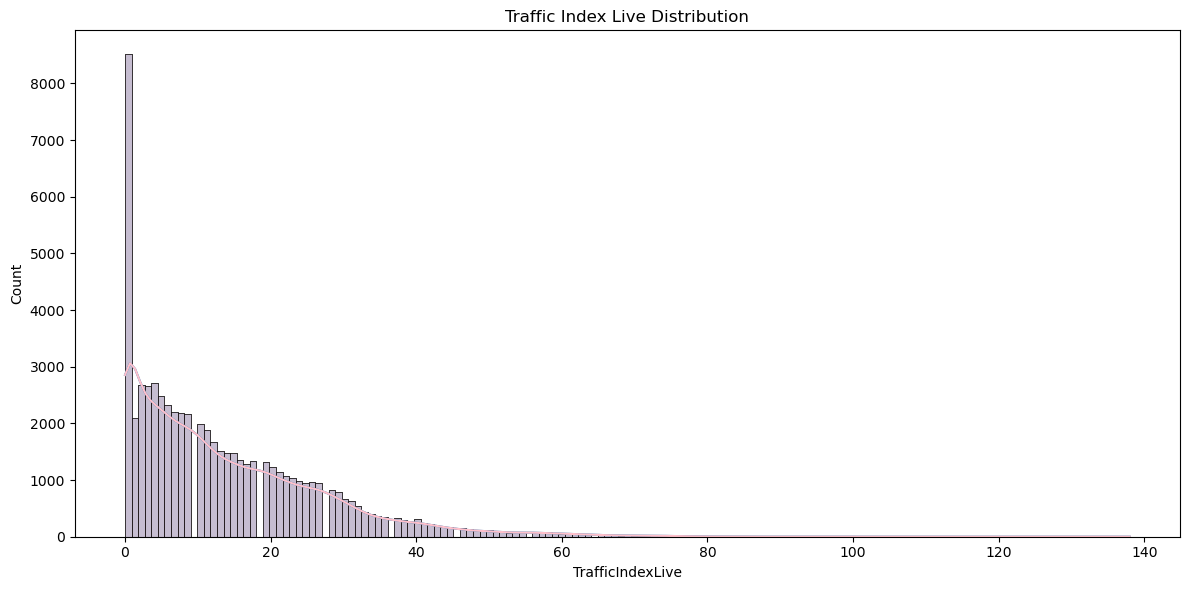

In [8]:
import seaborn as sns
plt.figure(figsize=(12, 6)) # Create a new figure for the plot with a size of 12 (width) by 6 (height) 
sns.histplot(df_cleaned['TrafficIndexLive'], kde=True)
plt.title('Traffic Index Live Distribution')
sns.histplot(df_cleaned['TrafficIndexLive'], kde=True, color='pink')
plt.tight_layout()
plt.show()

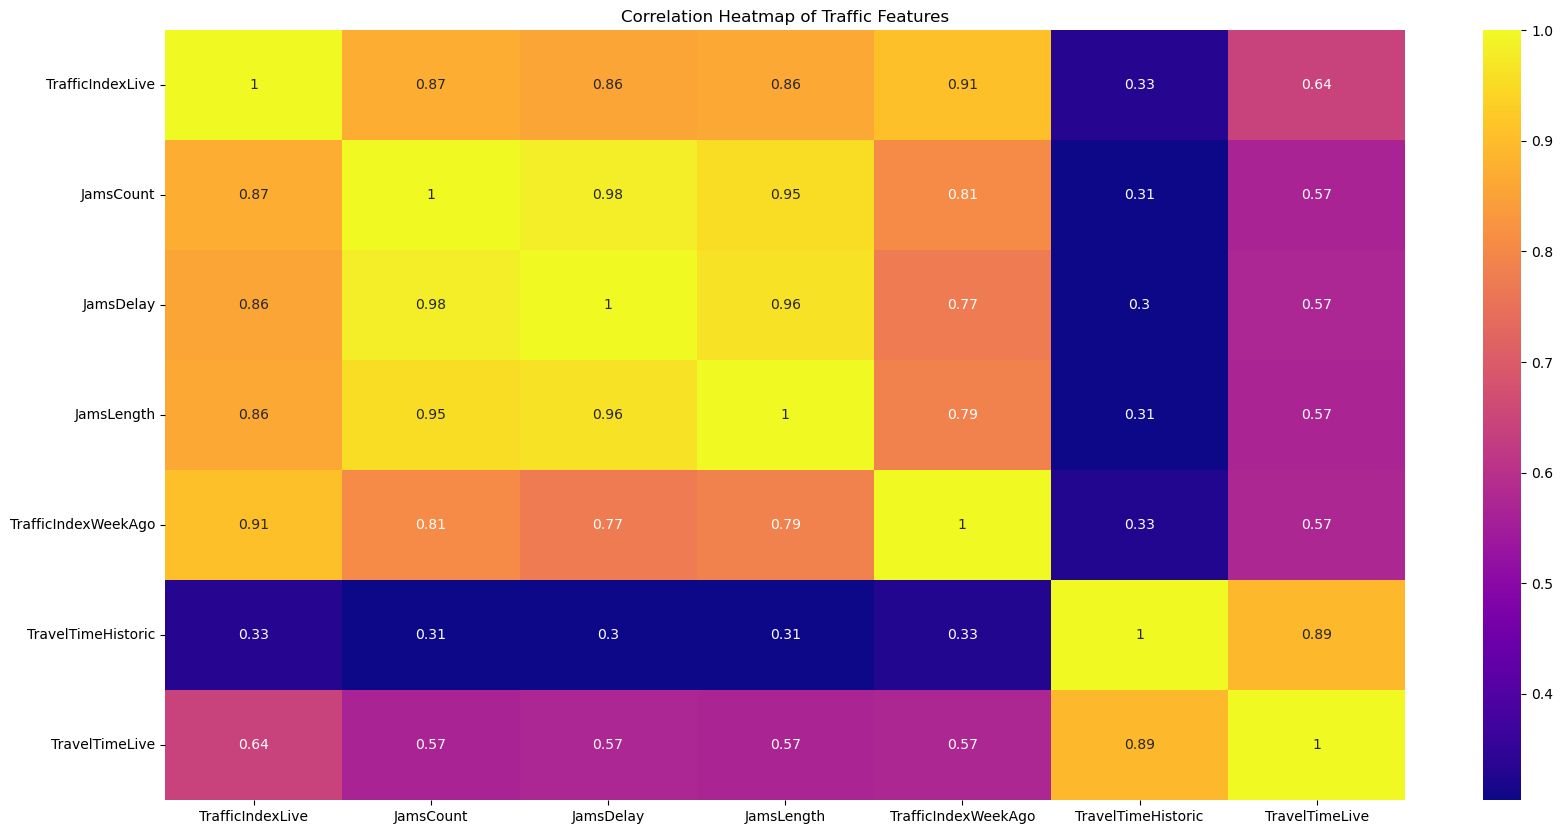

In [27]:
# Correlation heatmap
plt.figure(figsize=(20, 10))
numerical_cols = ['TrafficIndexLive', 'JamsCount', 'JamsDelay', 'JamsLength', 
                  'TrafficIndexWeekAgo', 'TravelTimeHistoric', 'TravelTimeLive']
sns.heatmap(df_cleaned[numerical_cols].corr(), annot=True, cmap='plasma')
plt.title('Correlation Heatmap of Traffic Features')
plt.show()

Null values in each column:
City                      0
Datetime                  0
TrafficIndexLive          0
JamsCount                 0
JamsDelay                 0
JamsLength                0
TrafficIndexWeekAgo       0
TravelTimeHistoric     3867
TravelTimeLive         3867
dtype: int64


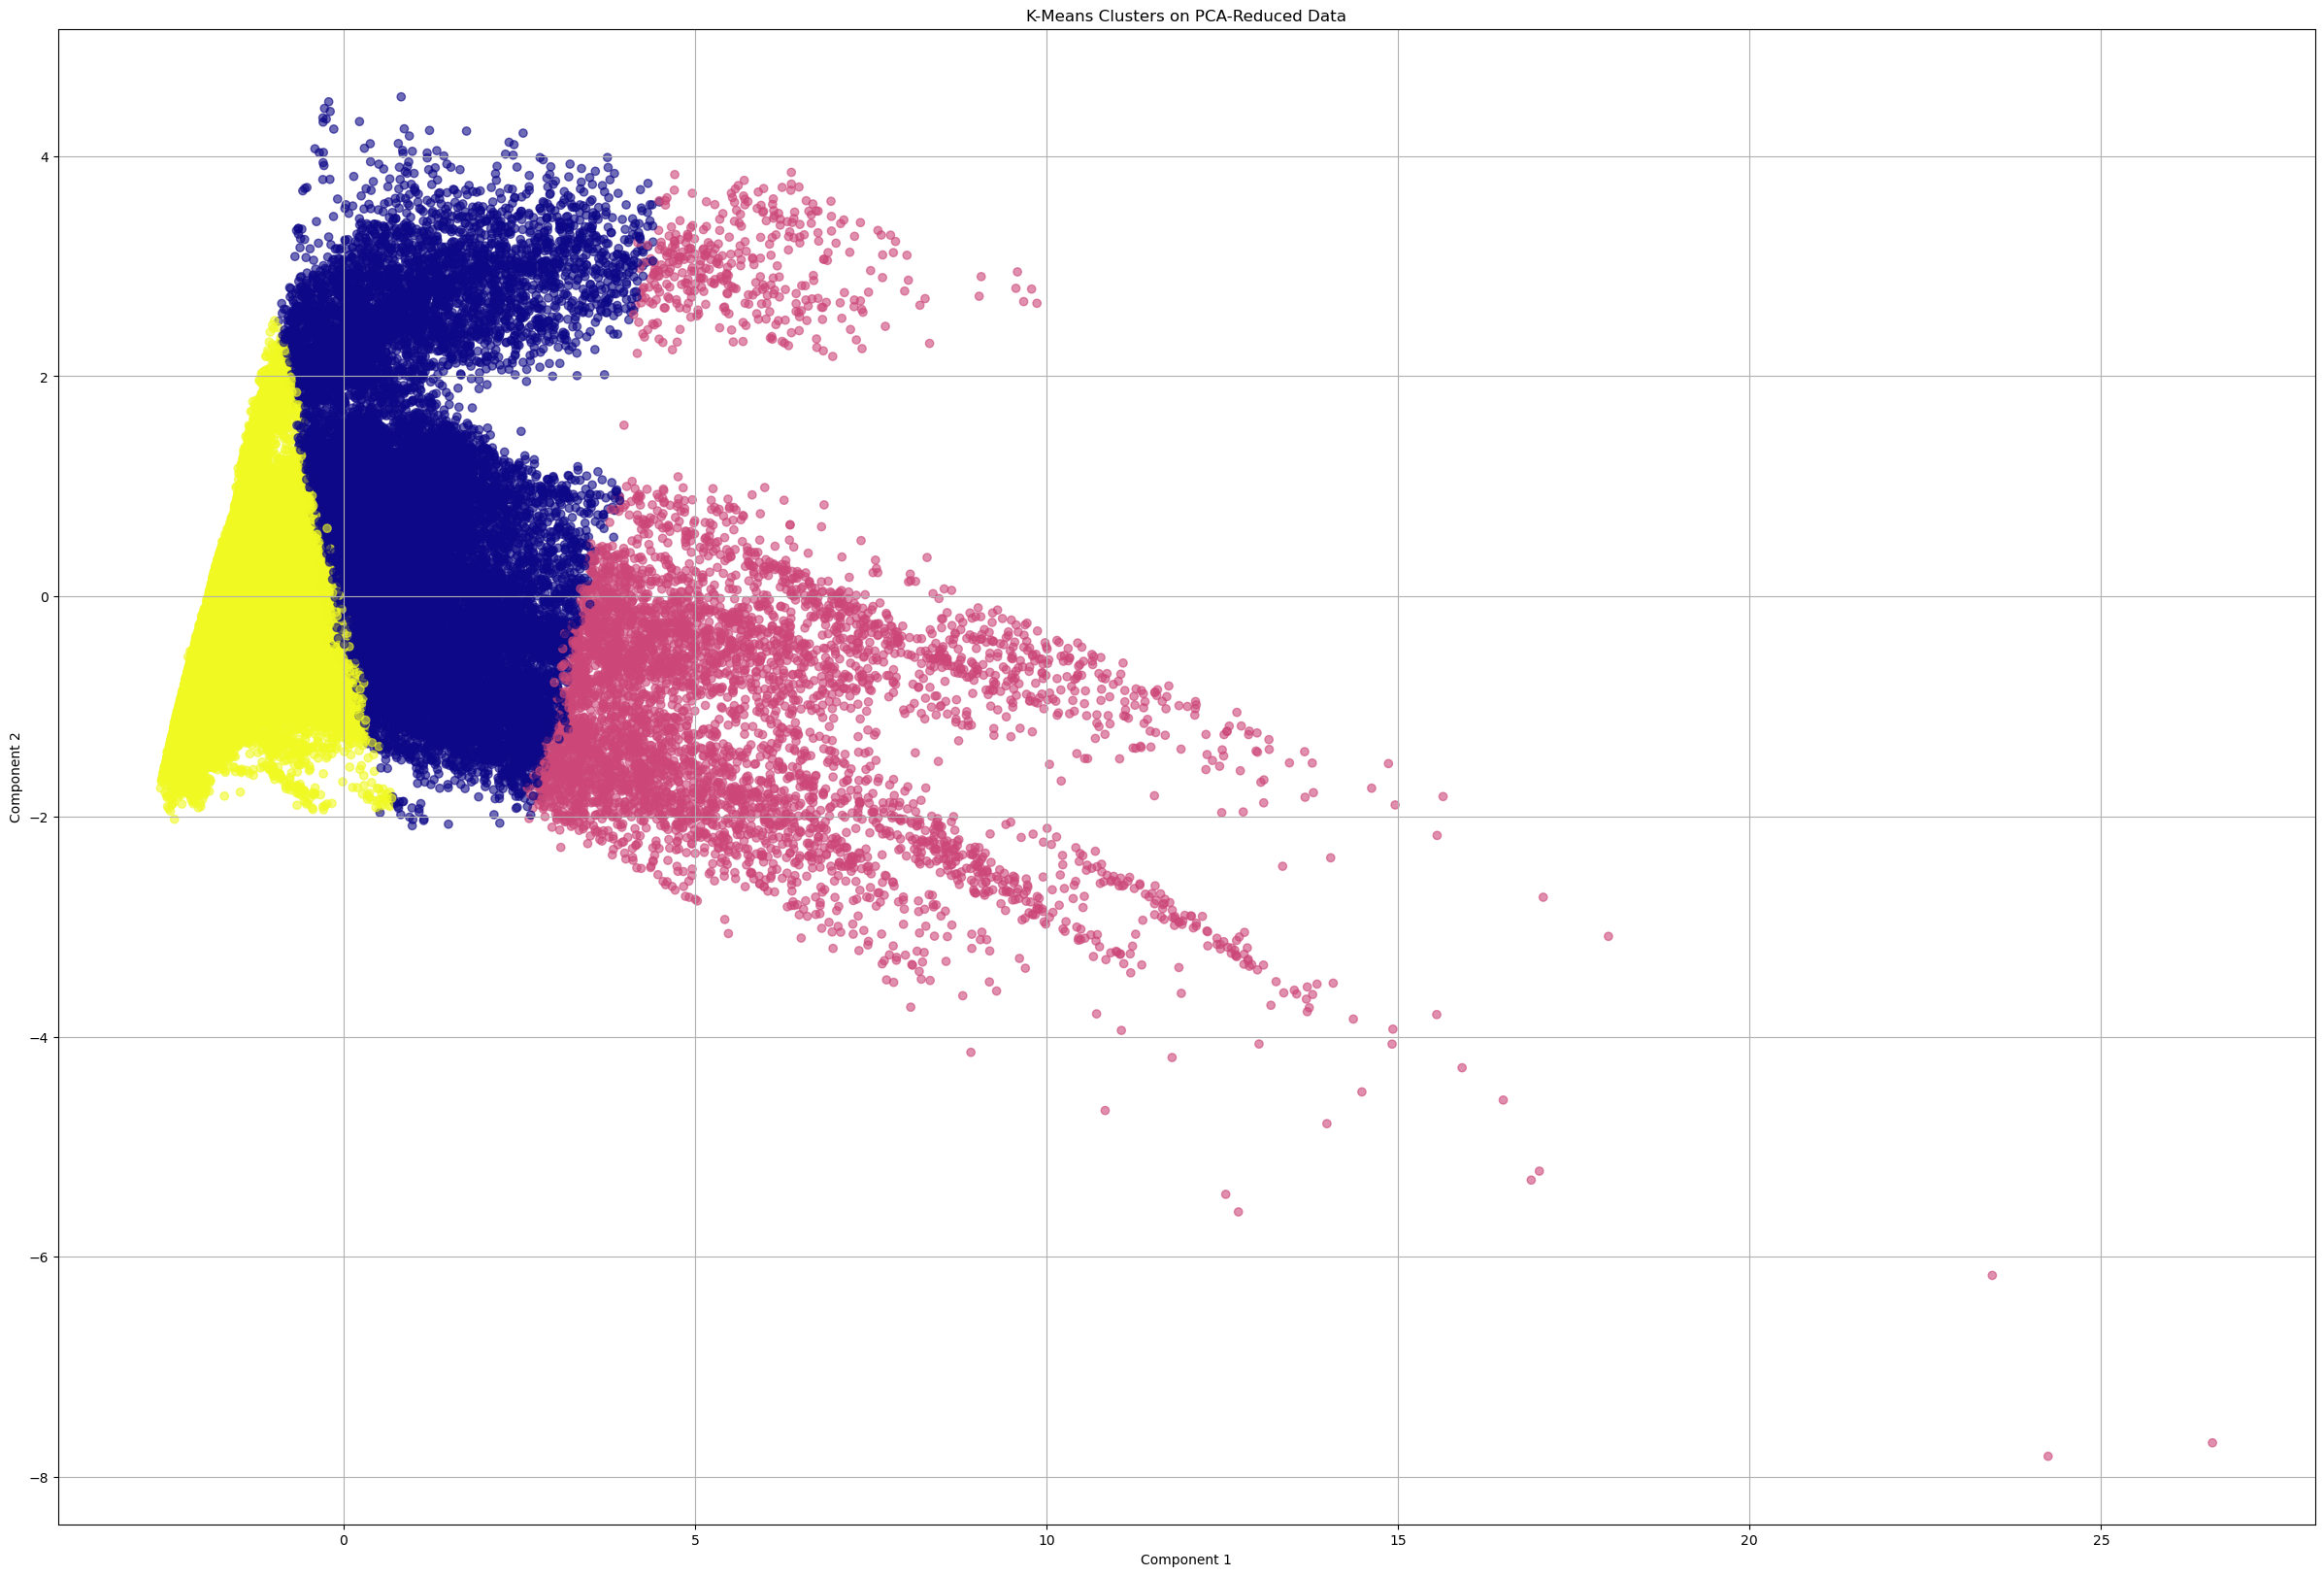

Silhouette Score: 0.41935199755837244


In [2]:
file_path = 'traffic_index.csv'  
df = pd.read_csv(file_path)
df_cleaned = df.dropna()
# Check for null values
print("Null values in each column:")
print(df.isnull().sum())
numerical_cols = ['TrafficIndexLive', 'JamsCount', 'JamsDelay', 'JamsLength', 
                  'TrafficIndexWeekAgo', 'TravelTimeHistoric', 'TravelTimeLive']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned[numerical_cols])


#Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
pca_result = pca.fit_transform(df_scaled)

#  Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned = df_cleaned.copy() 
df_cleaned.loc[:, 'Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize clusters using PCA reduced dimensions
plt.figure(figsize=(30,20))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_cleaned['Cluster'], cmap='plasma', alpha=0.6)
plt.title('K-Means Clusters on PCA-Reduced Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

# Silhouette Score for cluster evaluation
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_scaled, df_cleaned['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

In [11]:
# Define features and target
X = df_cleaned[['JamsCount', 'JamsDelay', 'JamsLength']]
y = df_cleaned['TrafficIndexLive']

# Linear regression
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)
mse_linear = mean_squared_error(y, y_pred_linear)

# Quadratic and Cubic regression
for degree in [2, 3]:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    y_pred_poly = poly_model.predict(X_poly)
    mse_poly = mean_squared_error(y, y_pred_poly)
    
    print(f'Degree {degree} Regression MSE: {mse_poly}')

print(f'Linear Regression MSE: {mse_linear}')

Degree 2 Regression MSE: 30.58897350828845
Degree 3 Regression MSE: 25.990210807215693
Linear Regression MSE: 39.887115186999786


In [12]:
df_cleaned = df_cleaned.copy()
df_cleaned.loc [:, 'TrafficClass'] = pd.cut(df_cleaned['TrafficIndexLive'], bins=3, labels=[0, 1, 2])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df_cleaned['TrafficClass'], test_size=0.3, random_state=42)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions and accuracy
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.9971856414613424


In [13]:
# For K-Means
silhouette_avg = silhouette_score(df_scaled, df_cleaned['Cluster'])
print(f'Silhouette Score for Clustering: {silhouette_avg}')

# For Regression (already printed MSE for each degree)
print(f'Linear Regression MSE: {mse_linear}')
print(f'Quadratic Regression MSE: {mse_poly}')

# For KNN
print(f'KNN Classification Accuracy: {accuracy}')

Silhouette Score for Clustering: 0.41935199755837244
Linear Regression MSE: 39.887115186999786
Quadratic Regression MSE: 25.990210807215693
KNN Classification Accuracy: 0.9971856414613424


Degree 2 Regression MSE: 30.58897350828845
Degree 3 Regression MSE: 25.990210807215693
Linear Regression MSE: 39.887115186999786


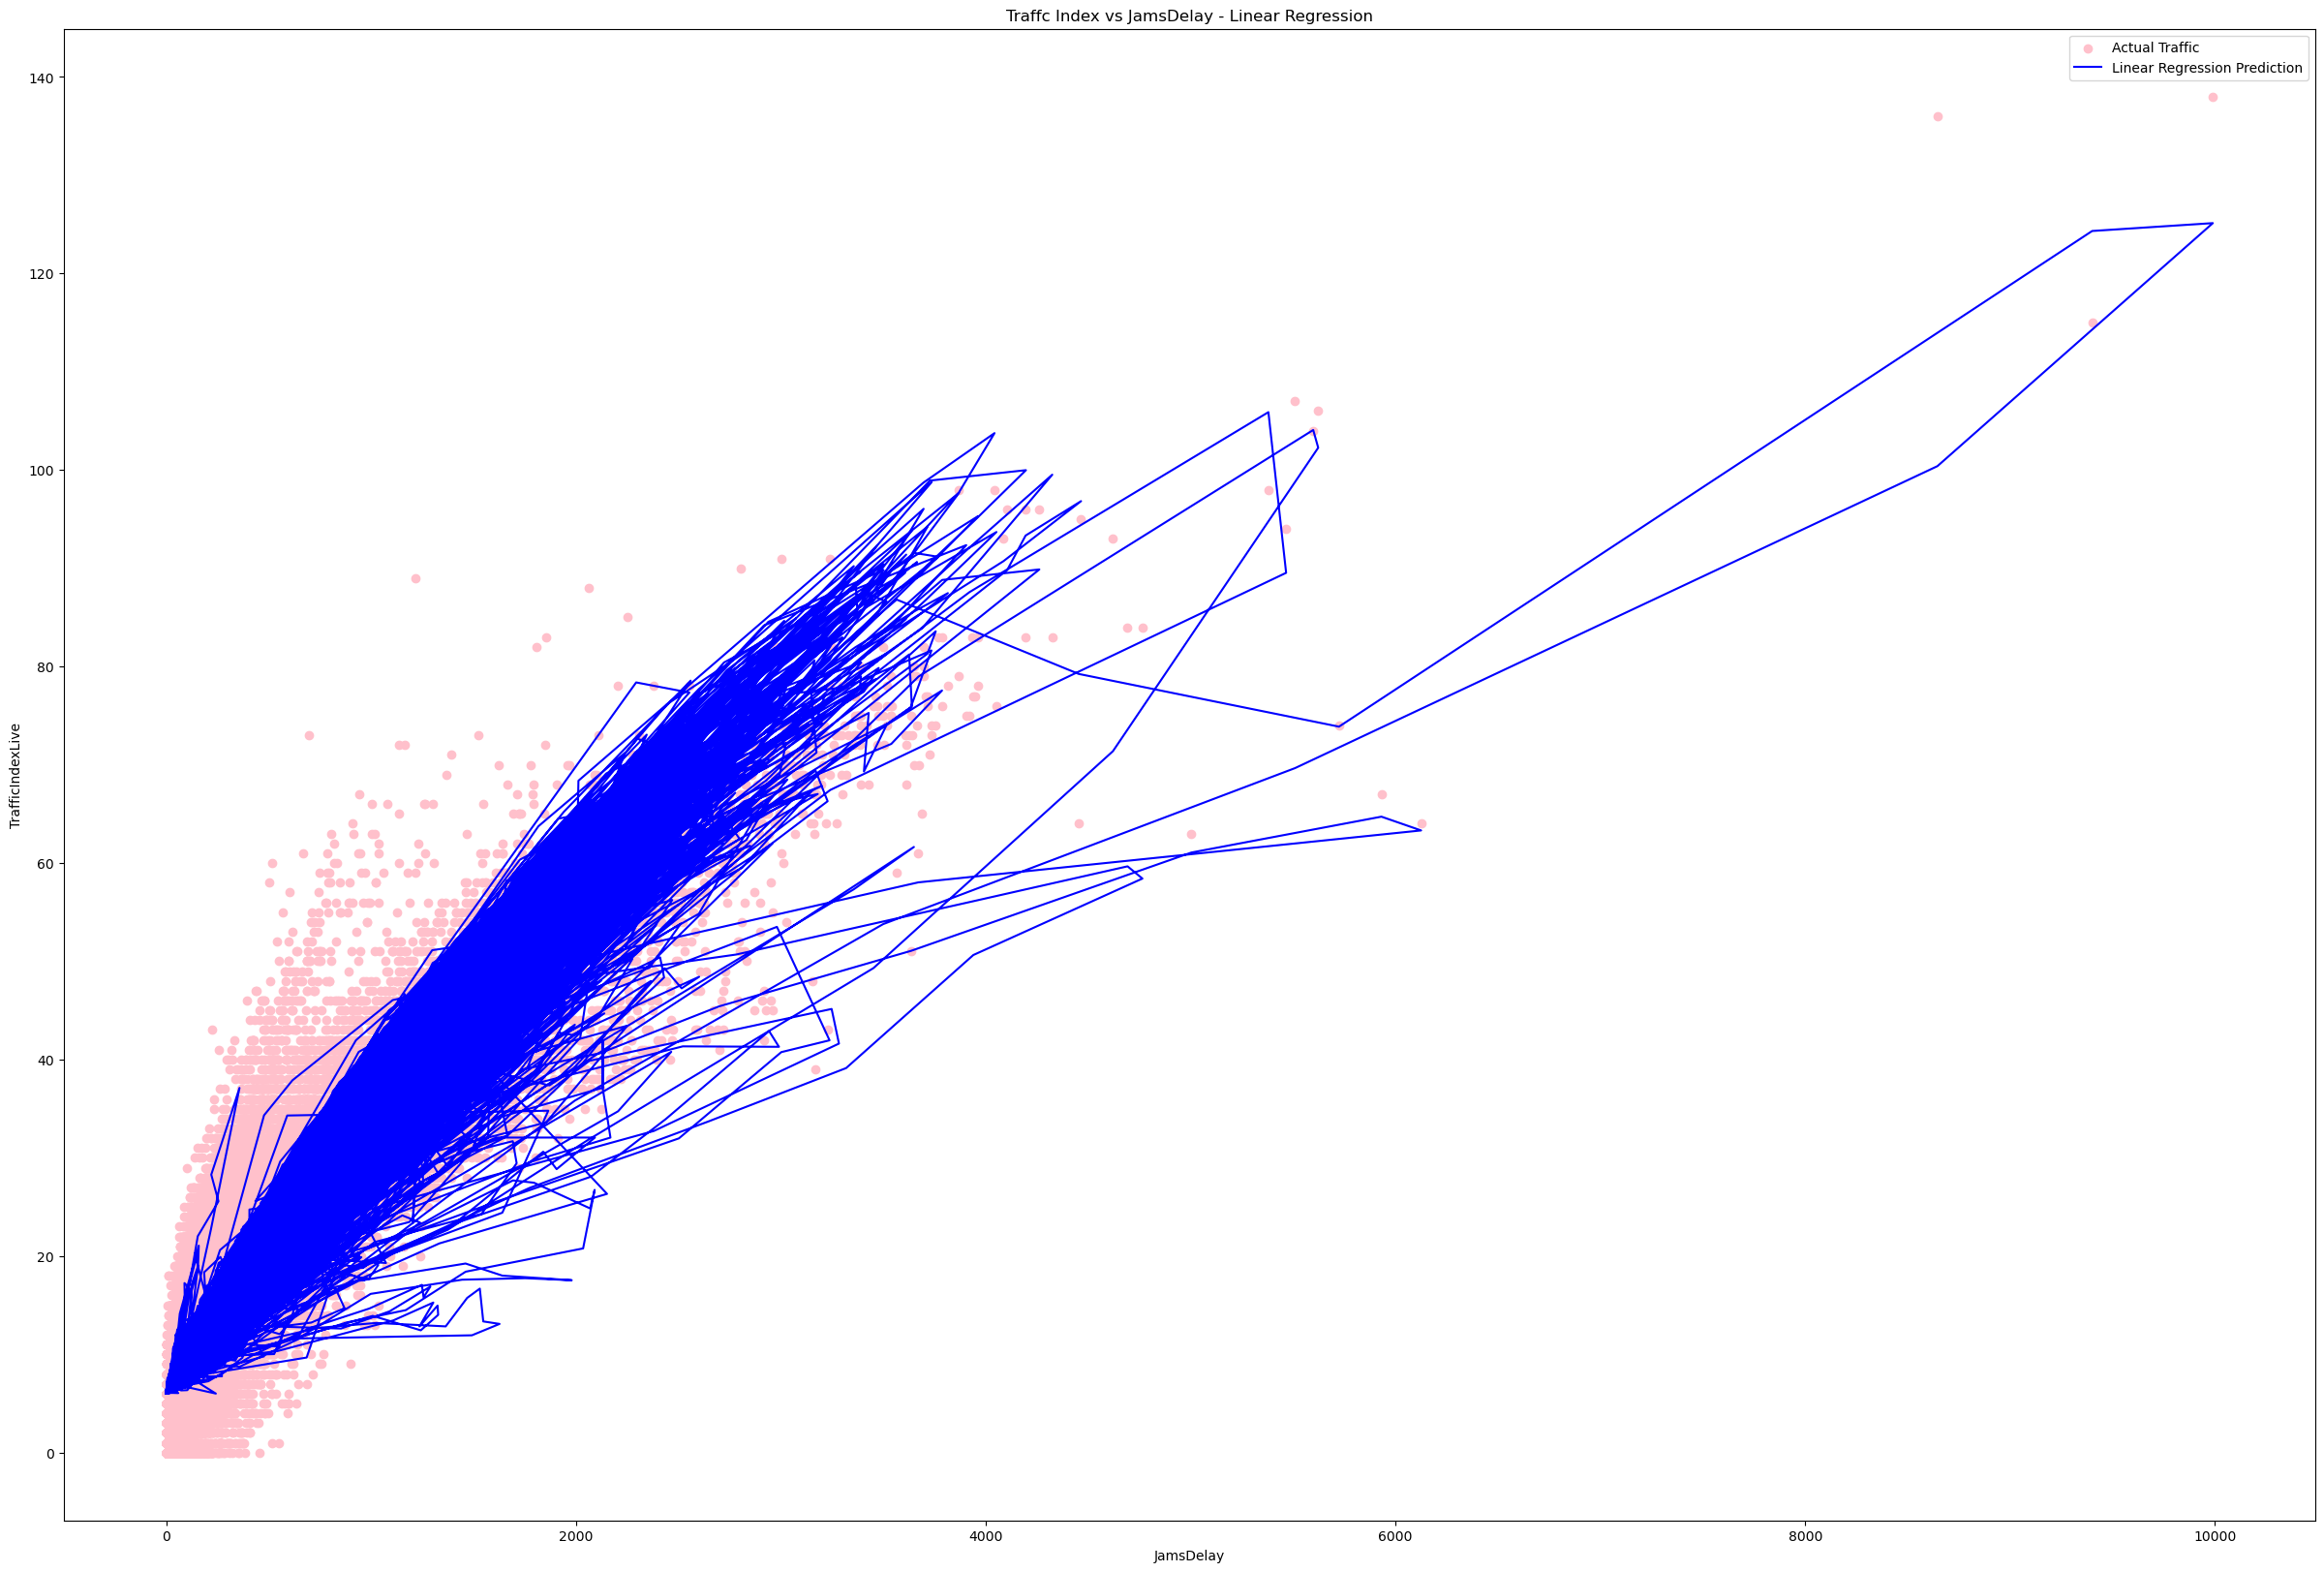

In [14]:

# Define features and target
X = df_cleaned[['JamsCount', 'JamsDelay', 'JamsLength']]
y = df_cleaned['TrafficIndexLive']

# Linear regression
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)
mse_linear = mean_squared_error(y, y_pred_linear)

# Quadratic and Cubic regression
for degree in [2, 3]:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    y_pred_poly = poly_model.predict(X_poly)
    mse_poly = mean_squared_error(y, y_pred_poly)
    
    print(f'Degree {degree} Regression MSE: {mse_poly}')

print(f'Linear Regression MSE: {mse_linear}')
# Regression plot for Linear Model
plt.figure(figsize=(30,20))
plt.scatter(X['JamsDelay'], y, color='pink', label='Actual Traffic')
plt.plot(X['JamsDelay'], y_pred_linear, color='blue', label='Linear Regression Prediction')
plt.title('Traffc Index vs JamsDelay - Linear Regression')
plt.xlabel('JamsDelay')
plt.ylabel('TrafficIndexLive')
plt.legend()
plt.show()

Degree 2 Regression MSE: 30.58897350828845


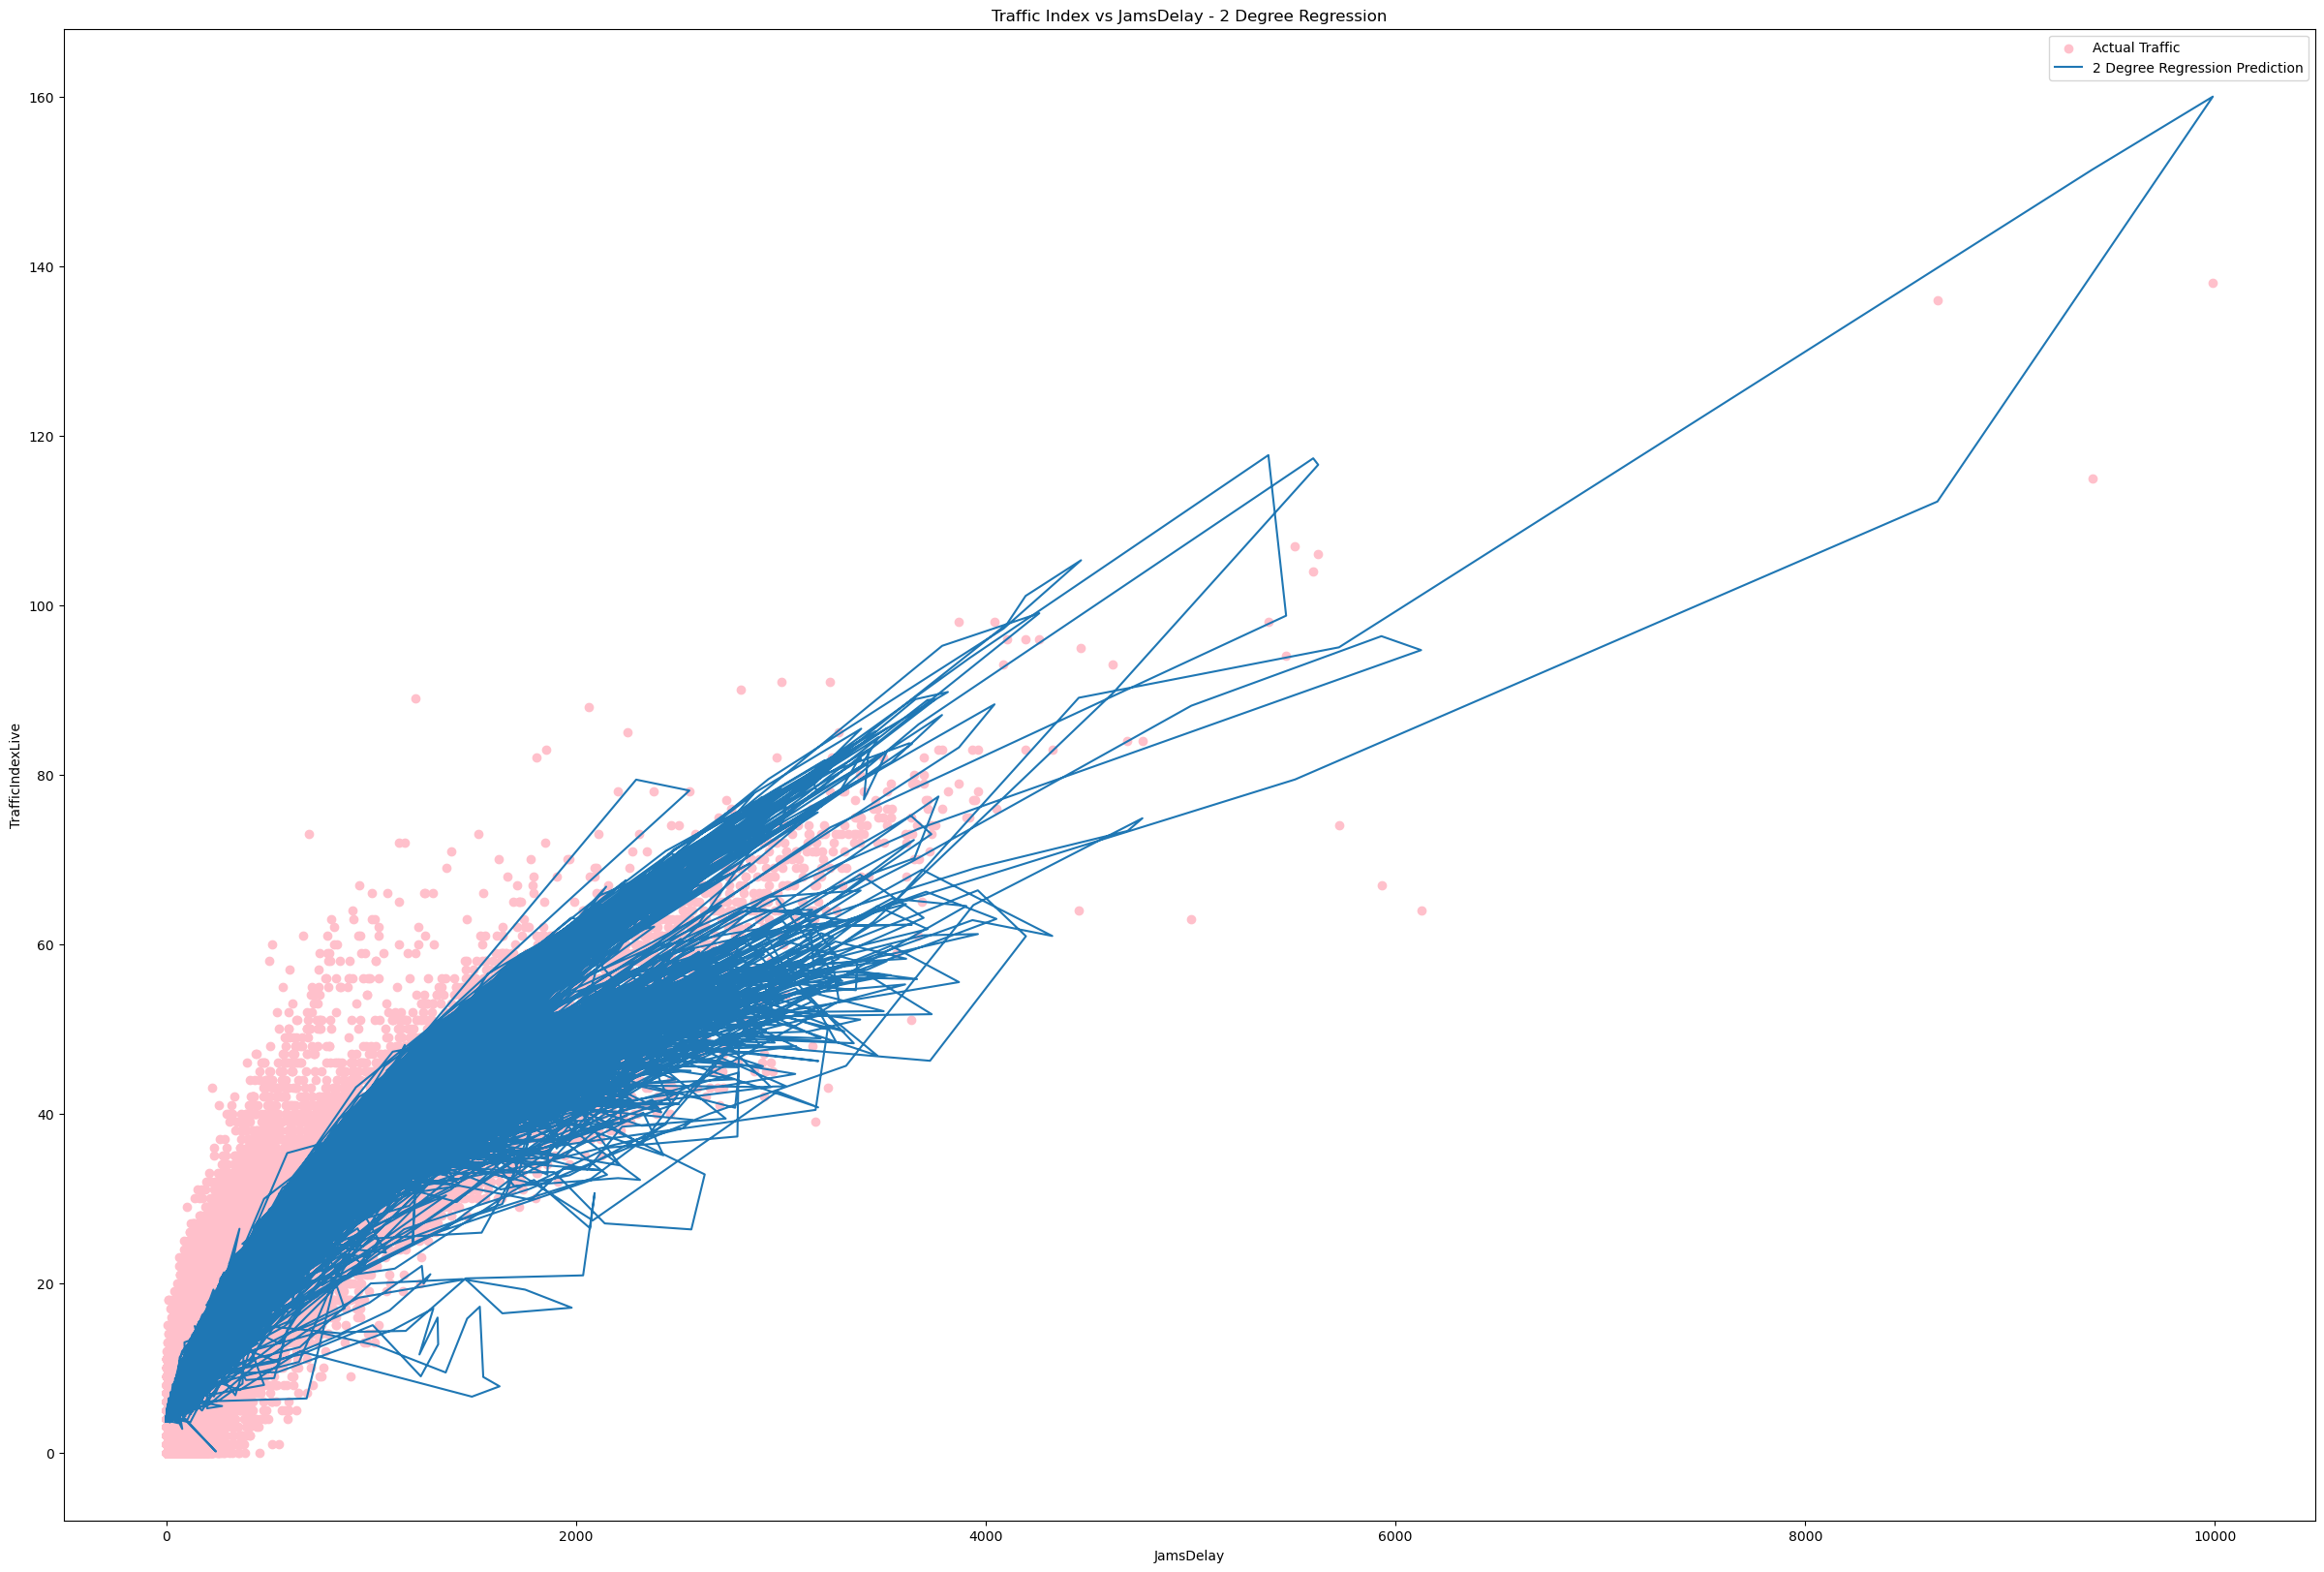

Degree 3 Regression MSE: 25.990210807215693


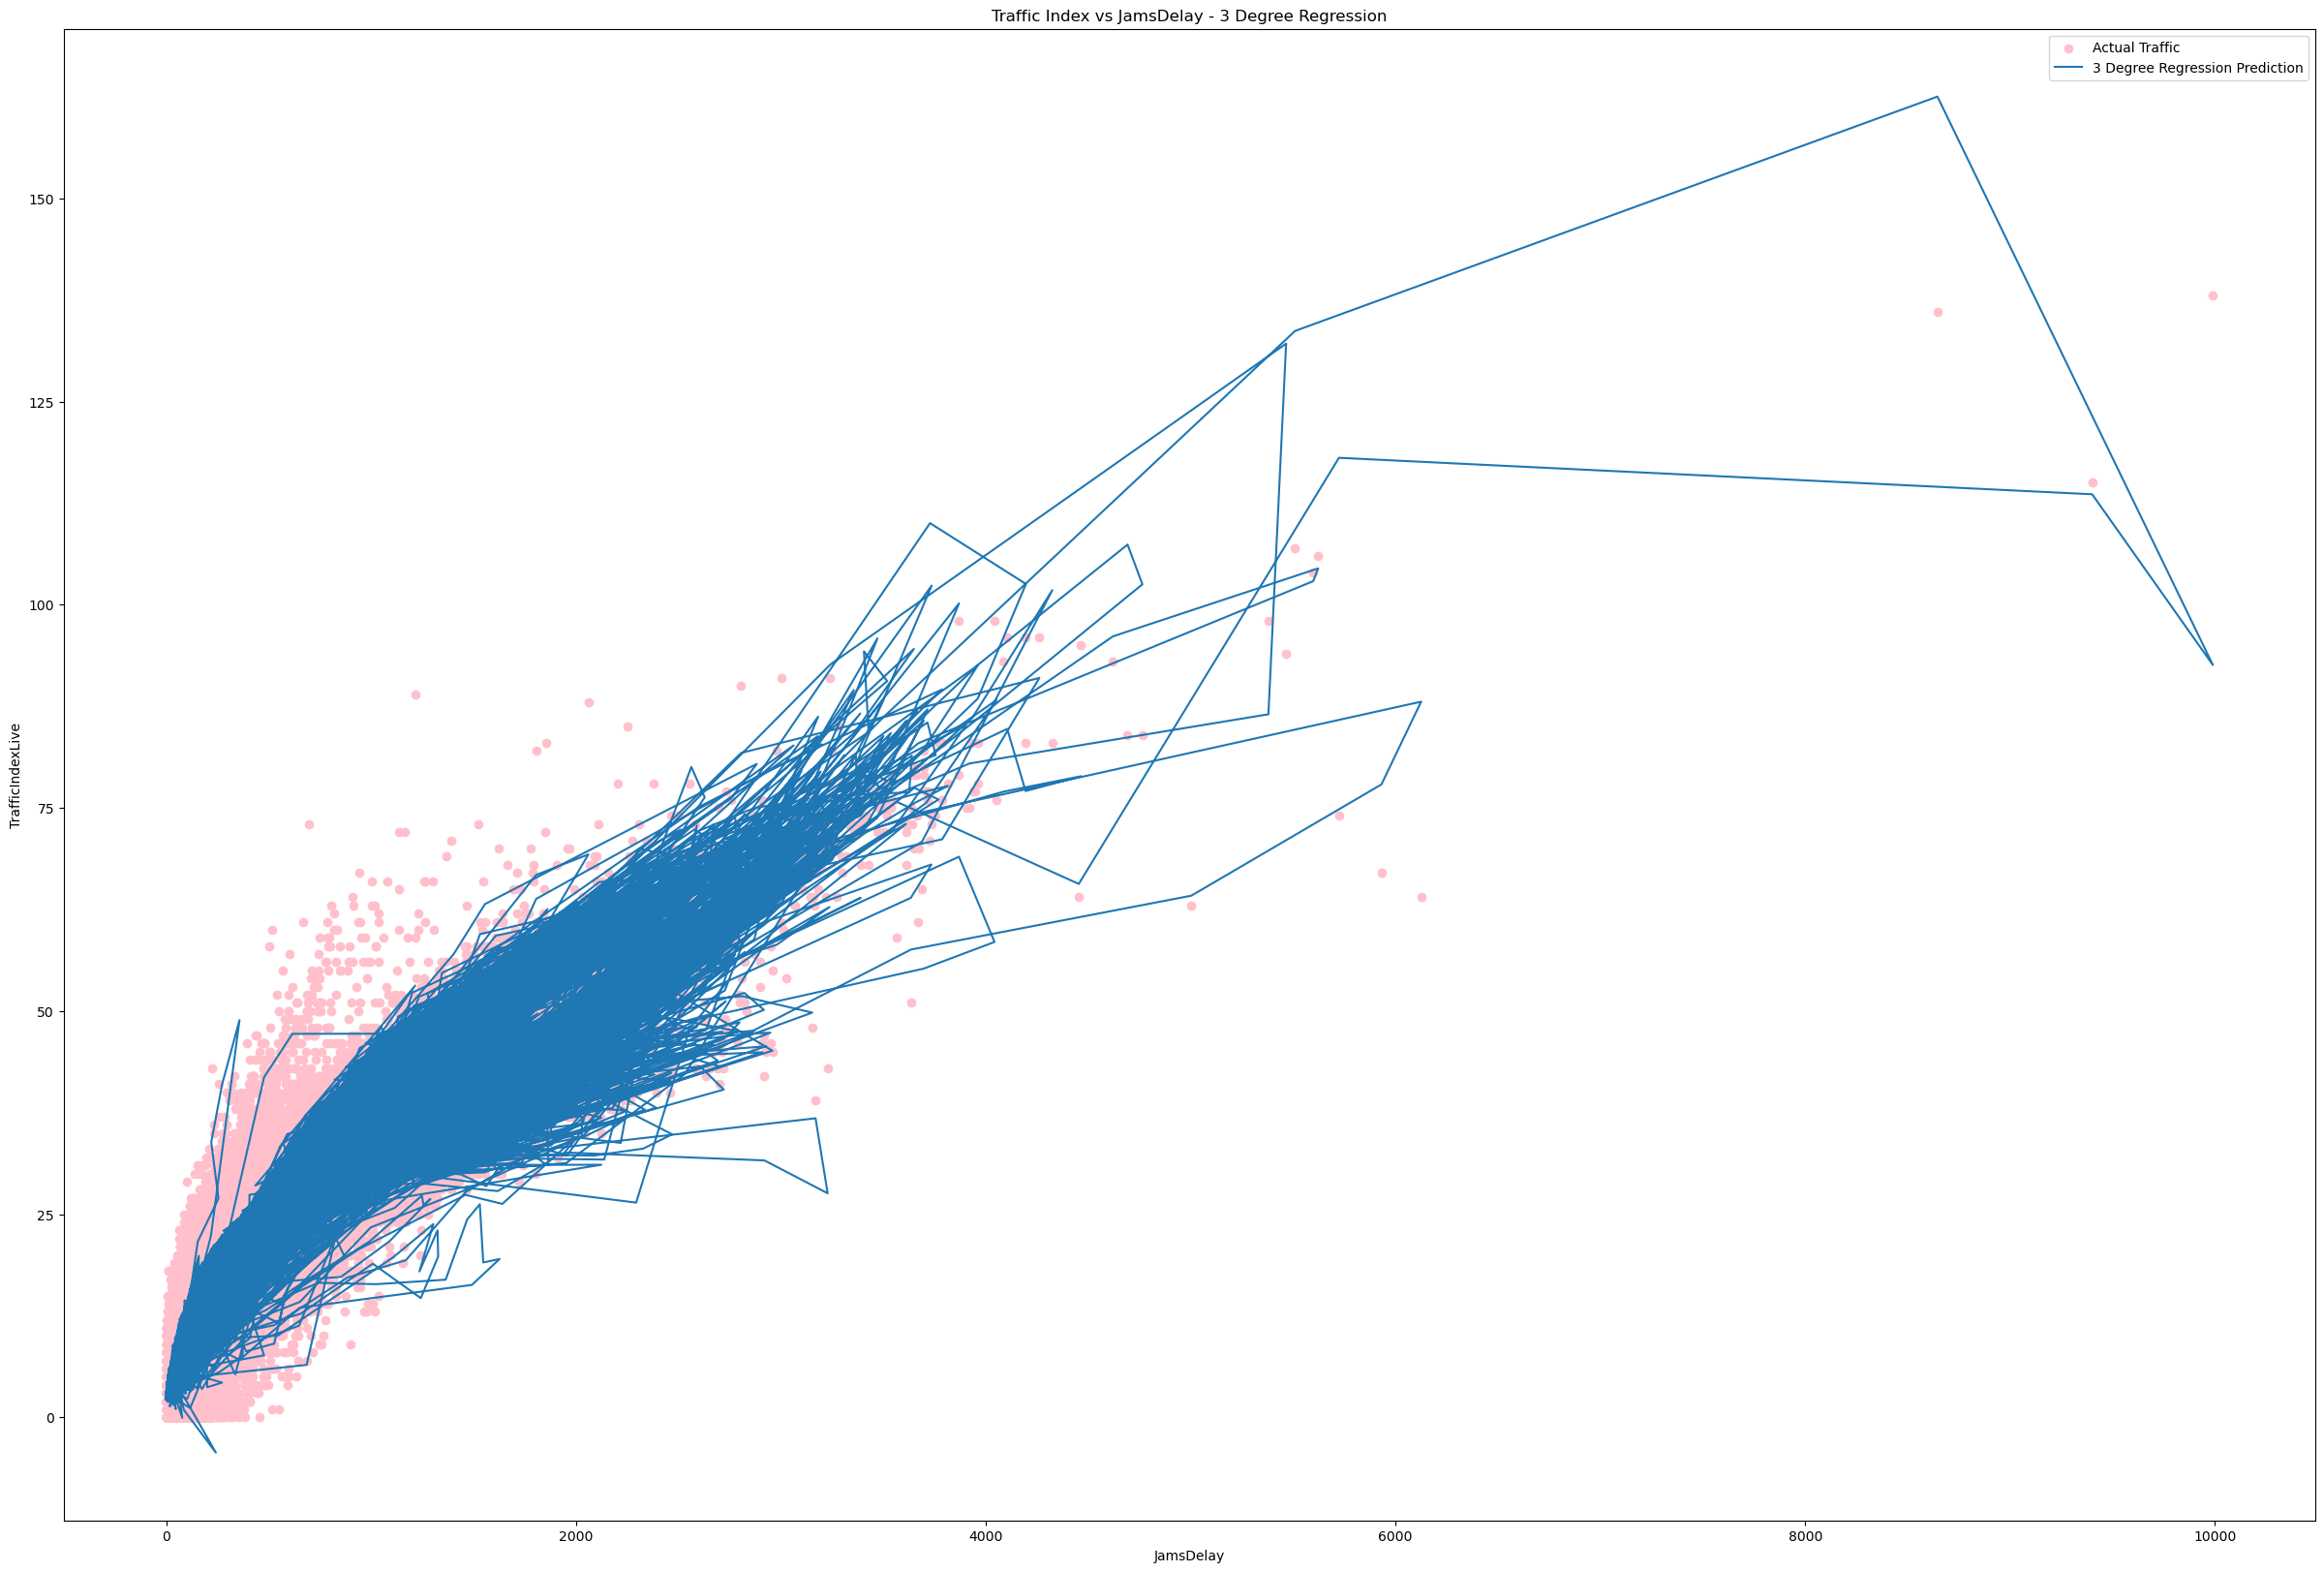

Linear Regression MSE: 39.887115186999786


In [15]:
# Define features and target
X = df_cleaned[['JamsCount', 'JamsDelay', 'JamsLength']]
y = df_cleaned['TrafficIndexLive']

# Linear regression
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)
mse_linear = mean_squared_error(y, y_pred_linear)


# Polynomial Regression (Quadratic and Cubic)
for degree in [2, 3]:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    y_pred_poly = poly_model.predict(X_poly)
    mse_poly = mean_squared_error(y, y_pred_poly)
    
    print(f'Degree {degree} Regression MSE: {mse_poly}')
    
    # Plot for Polynomial Regression (Quadratic or Cubic)
    plt.figure(figsize=(30,20))
    plt.scatter(X['JamsDelay'], y, color='pink', label='Actual Traffic')
    plt.plot(X['JamsDelay'], y_pred_poly, label=f'{degree} Degree Regression Prediction')
    plt.title(f'Traffic Index vs JamsDelay - {degree} Degree Regression')
    plt.xlabel('JamsDelay')
    plt.ylabel('TrafficIndexLive')
    plt.legend()
    plt.show()

# Show MSE for linear regression
print(f'Linear Regression MSE: {mse_linear}')